In [1]:
import io
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline

import polars as pl
from skimpy import skim
from summarytools import dfSummary
#summarytools doesnt work with polars library, it works with pandas tho

#%load_ext cudf.pandas
#supercharges workflow with GPU acceleration using cudf.pandas
#Im having pip install issues with cudf so commenting it out for now

In [2]:
fifa = pd.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset_cleaned\fifa_training_2017_2022.csv')
#fifa.style.bar(cmap = "Blues", subset = "Value")
#fifa.style.bar(color = "blue", subset= "Value")
#pandas dataframe styling!!!
fifa.head(5)

ID            Name  Age Nationality  Overall  Potential  \
0  176580       L. Suárez   29     Uruguay       92         92   
1  178518   R. Nainggolan   28     Belgium       86         86   
2  181872        A. Vidal   29       Chile       87         87   
3  197445        D. Alaba   24     Austria       86         89   
4  195864        P. Pogba   23      France       88         94   

                Club       Value      Wage  Special  ...  \
0       FC Barcelona  83000000.0  525000.0     2291  ...   
1               Roma  37500000.0  130000.0     2290  ...   
2  FC Bayern München  41500000.0  180000.0     2285  ...   
3  FC Bayern München  41500000.0  140000.0     2279  ...   
4  Manchester United  71500000.0  225000.0     2271  ...   

  Contract_Years_Remaining  Position_Group  Attacking_Composite  \
0                      4.0         Forward            89.000000   
1                      4.0           Other            82.000000   
2                      2.0           Other            82.000000   
3                      4.0        Defender            76.333333   
4                      4.0           Other            82.666667   

   Passing_Composite Defending_Composite  Physical_Composite  \
0          77.000000           37.666667           79.333333   
1          80.333333           83.666667           82.666667   
2          82.000000           83.000000           84.666667   
3          80.333333           82.333333           79.333333   
4          86.666667           71.333333           89.000000   

  Technical_Composite Pace_Composite  Int_Rep_Category  Market_Tier  
0           87.666667           82.5         Worldwide    Superstar  
1           79.333333           79.5          National         Star  
2           78.333333           75.5       Continental         Star  
3           80.000000           86.0       Continental         Star  
4           87.666667           77.0       Continental    Superstar  

[5 rows x 80 columns]

In [3]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102496 entries, 0 to 102495
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        102496 non-null  int64  
 1   Name                      102496 non-null  object 
 2   Age                       102496 non-null  int64  
 3   Nationality               102496 non-null  object 
 4   Overall                   102496 non-null  int64  
 5   Potential                 102496 non-null  int64  
 6   Club                      102496 non-null  object 
 7   Value                     102496 non-null  float64
 8   Wage                      102496 non-null  float64
 9   Special                   102496 non-null  int64  
 10  Preferred Foot            102496 non-null  object 
 11  International Reputation  102496 non-null  float64
 12  Weak Foot                 102496 non-null  float64
 13  Skill Moves               102496 non-null  f

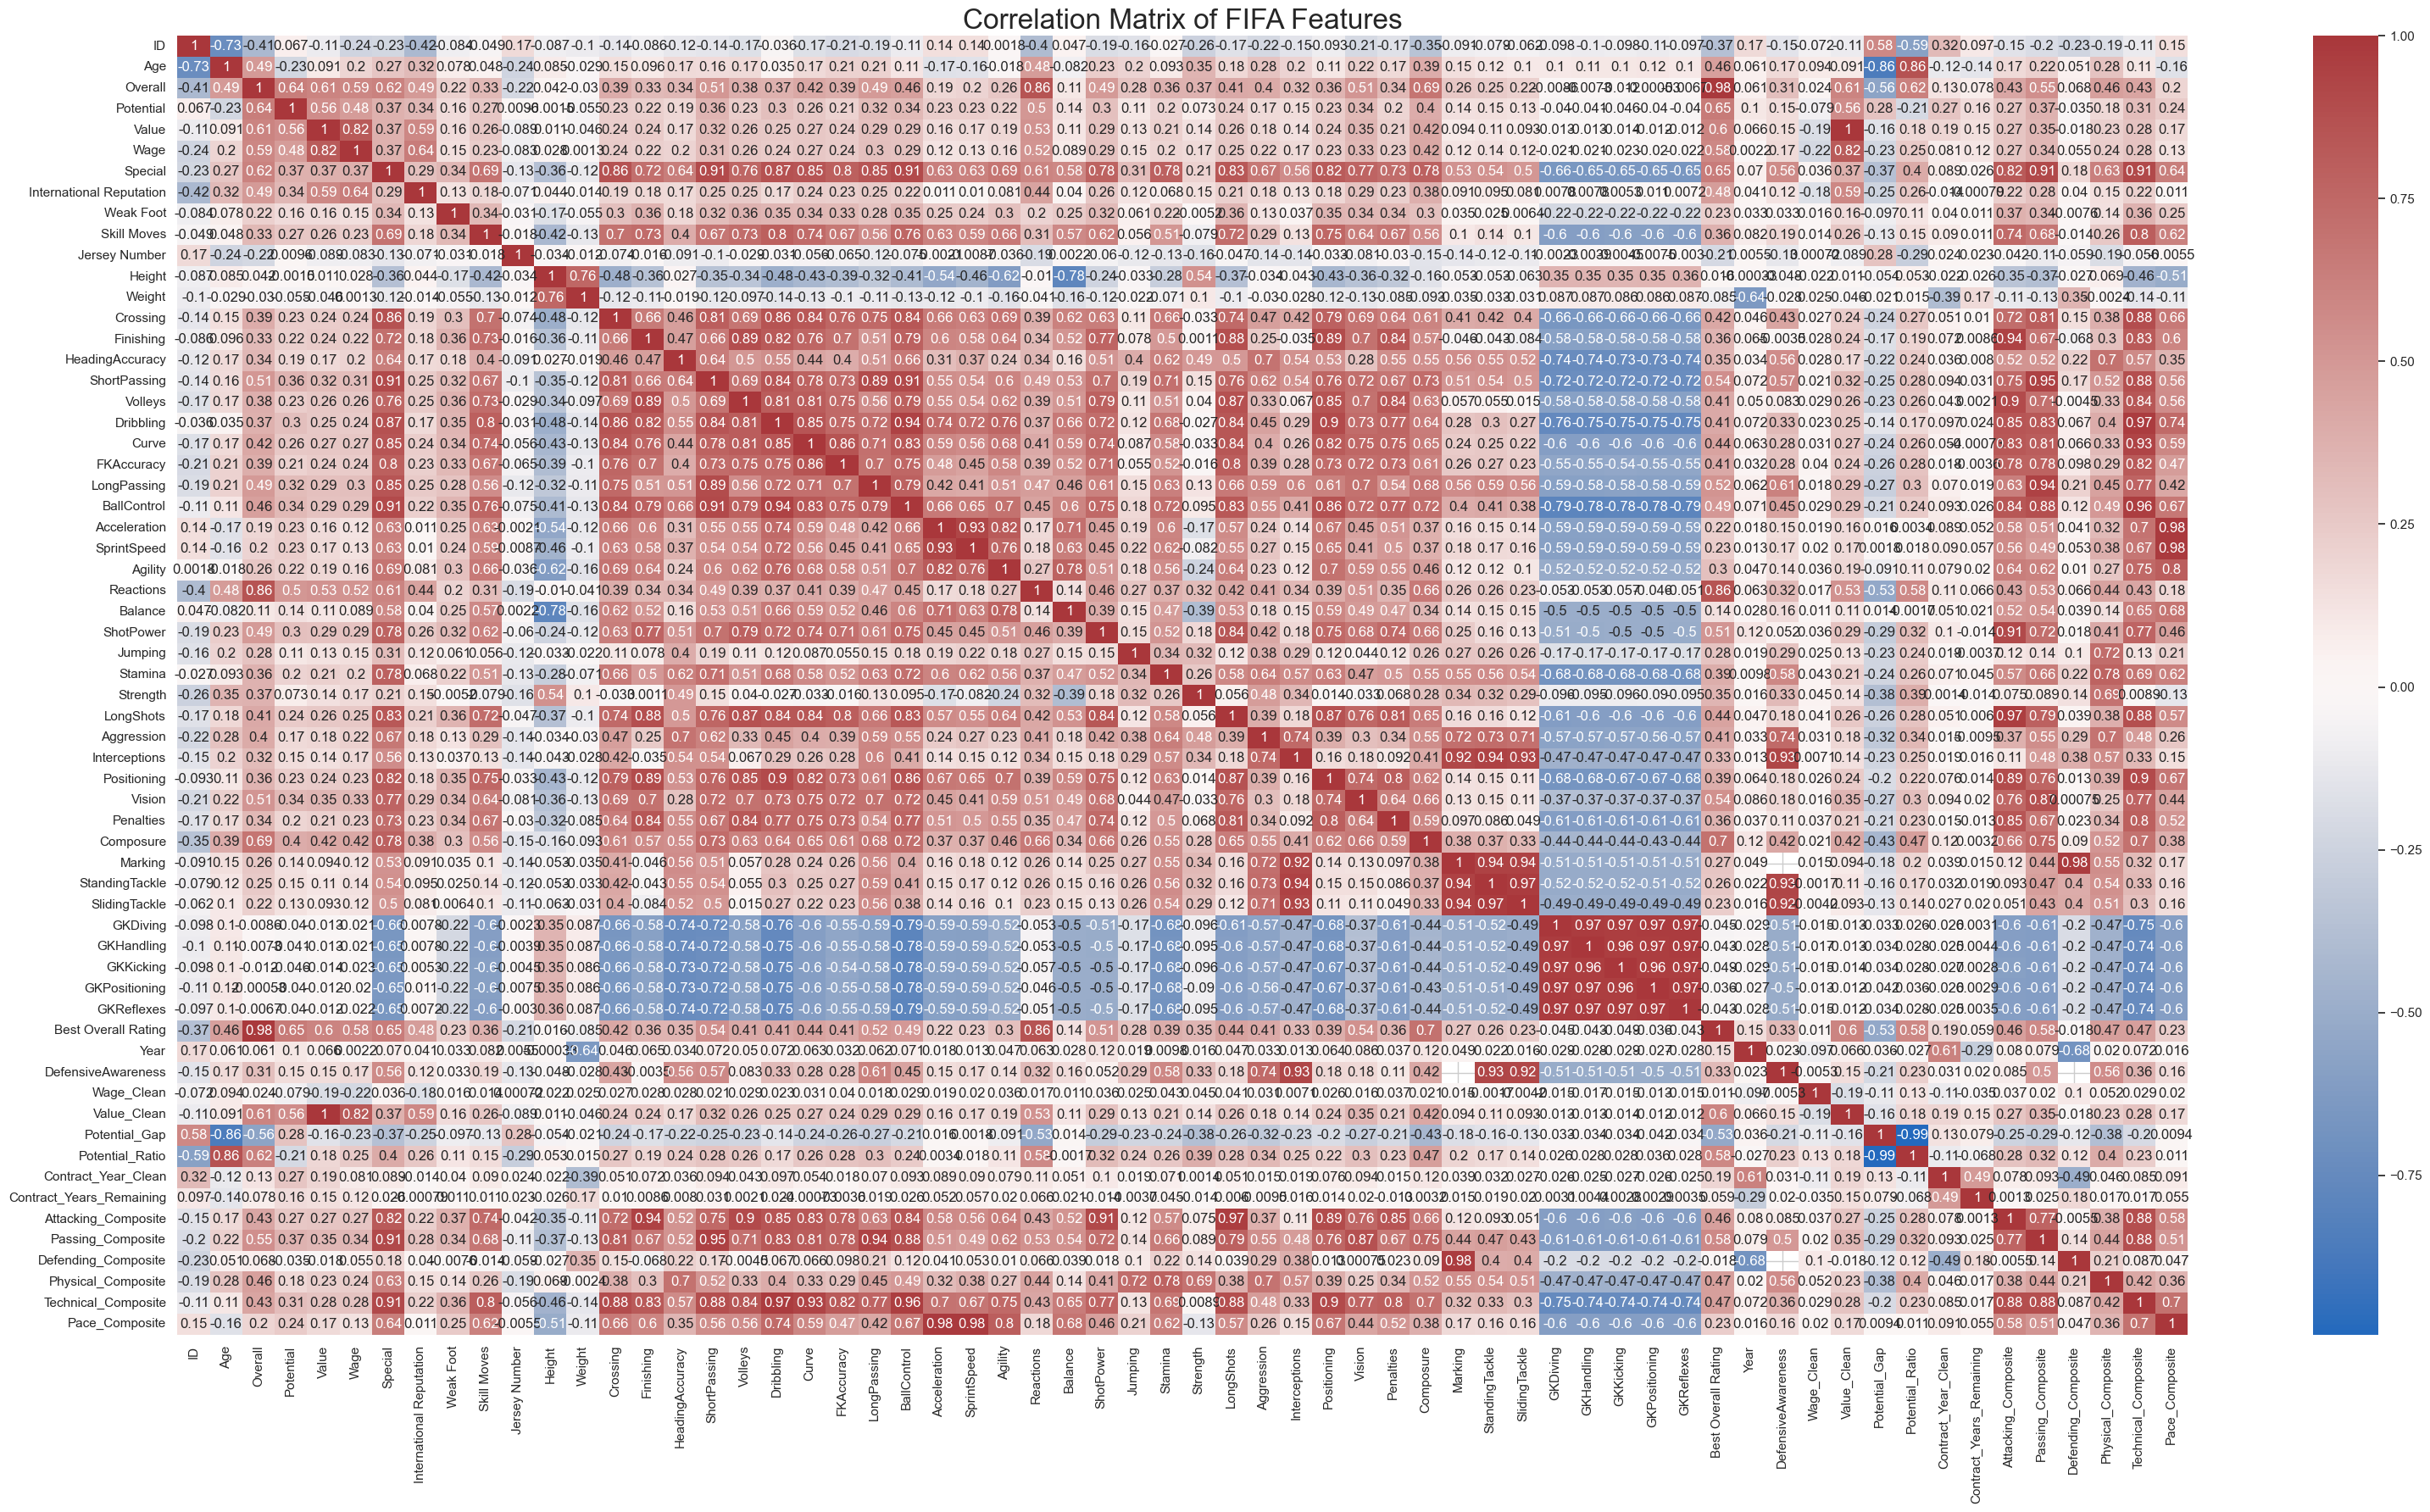

In [13]:
plt.figure(figsize=(32,18))
numeric_fifa = fifa.select_dtypes(include=[np.number])
sns.heatmap(numeric_fifa.corr(), annot=True, cmap='vlag', center=0)
plt.title('Correlation Matrix of FIFA Features', fontsize=24)
plt.tight_layout()
plt.show()

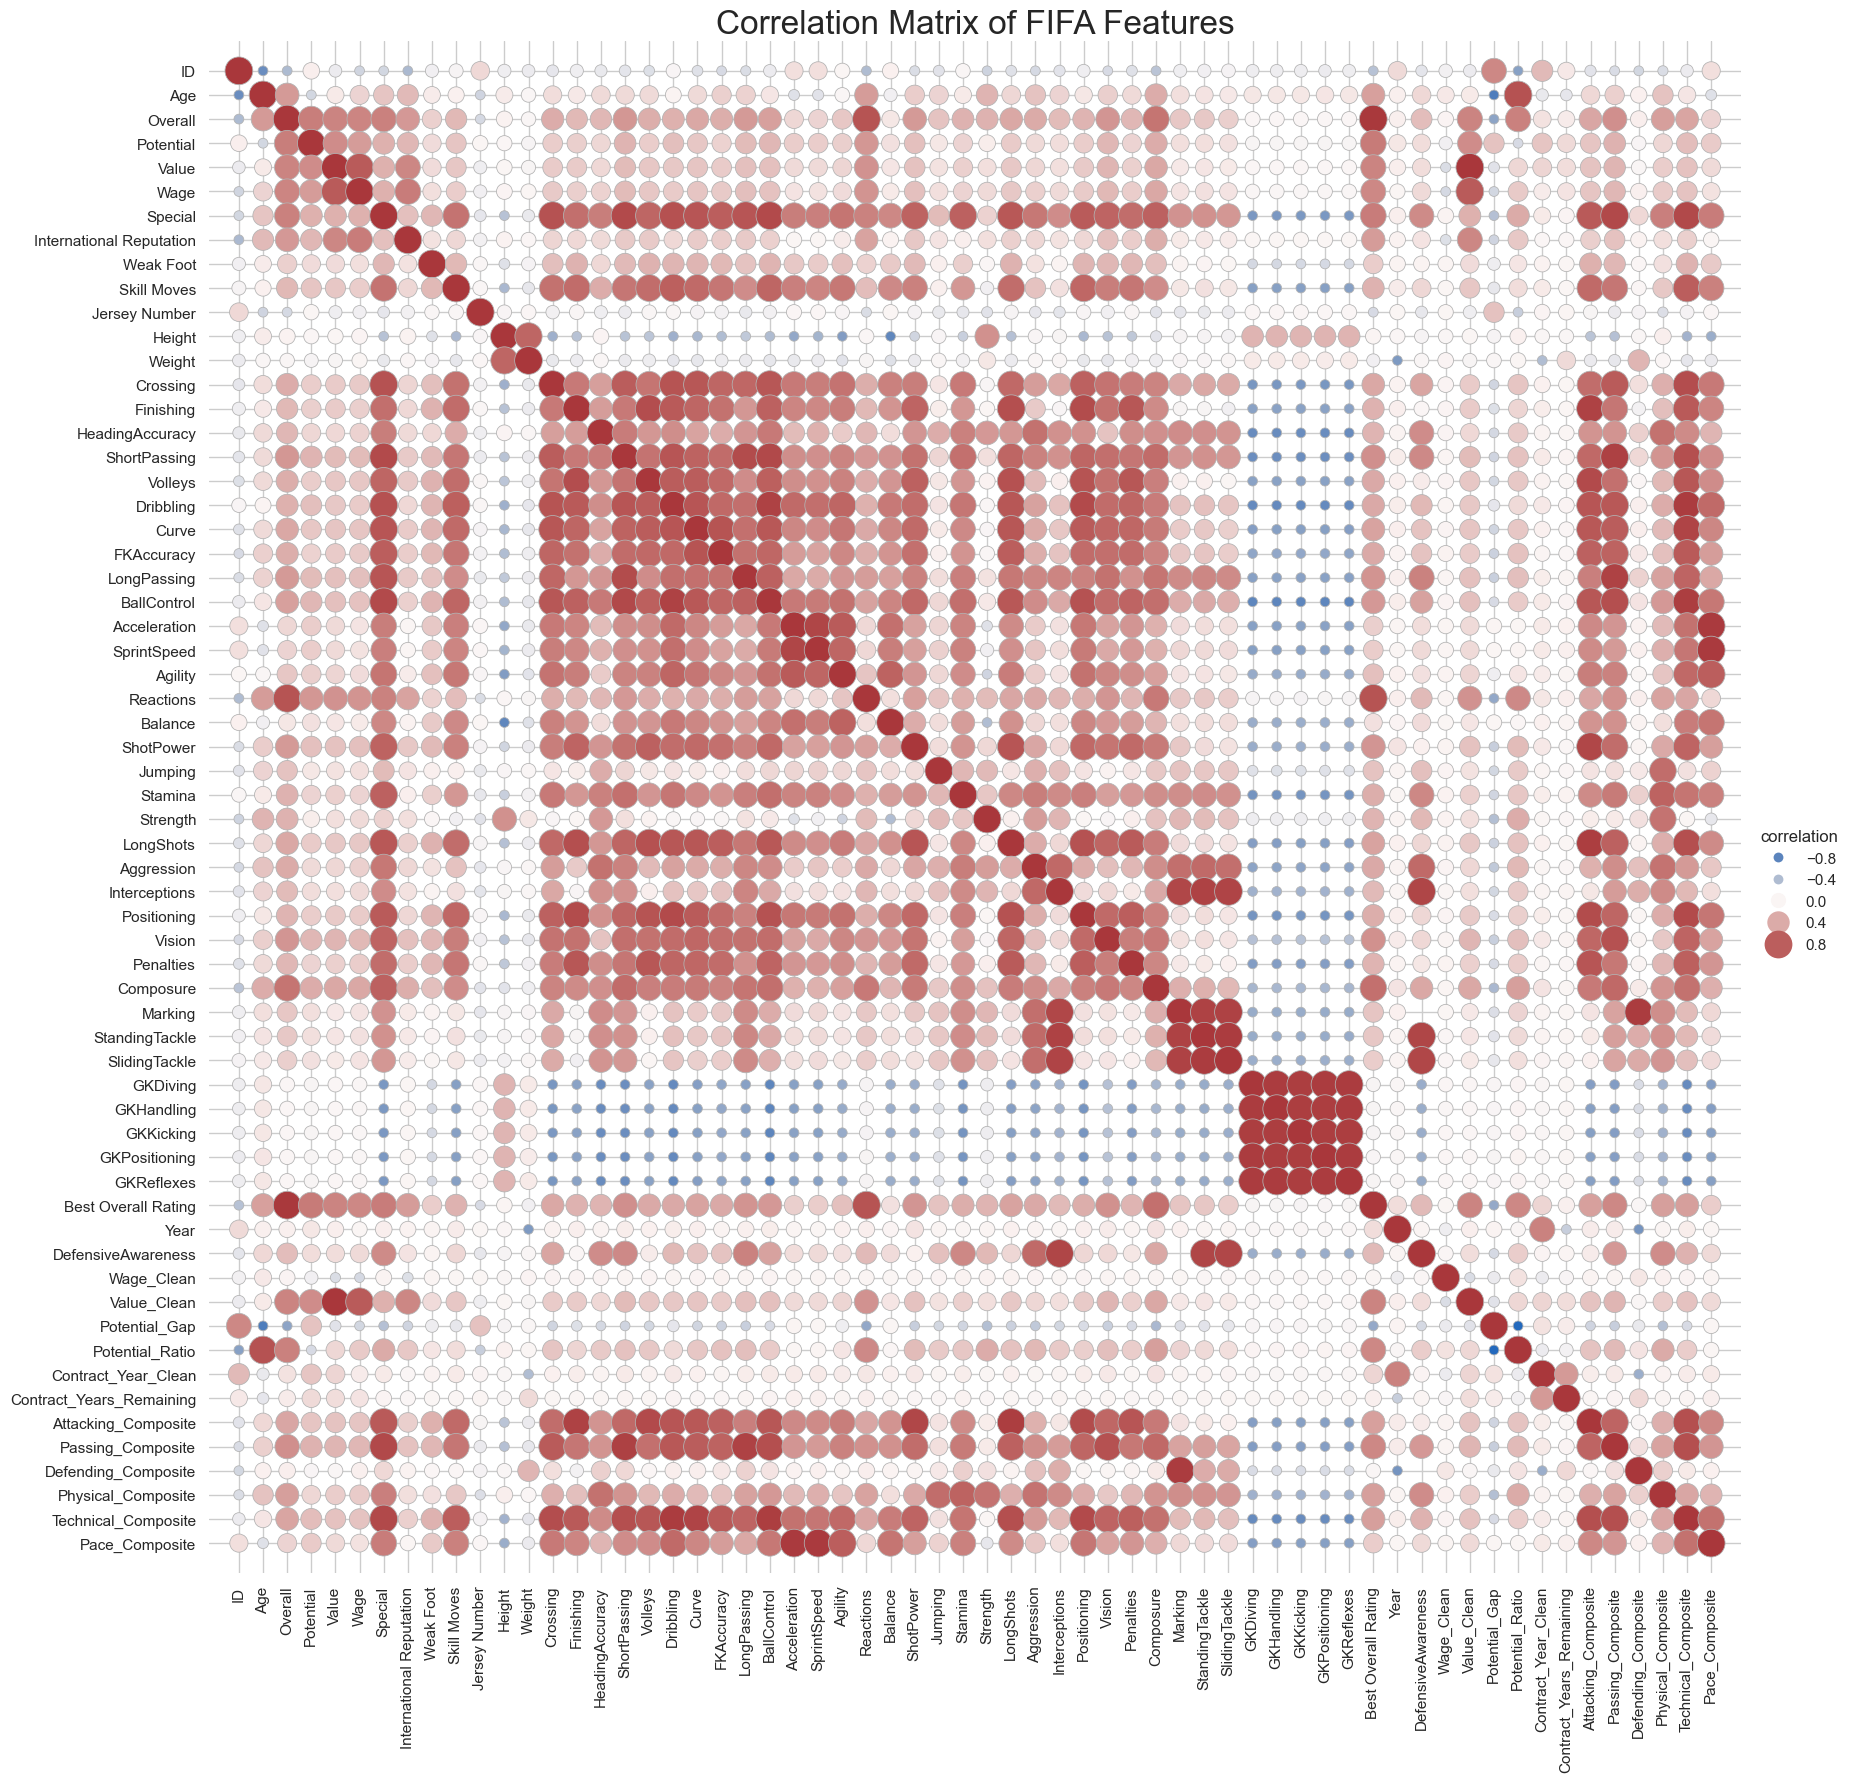

In [16]:
# Advanced correlation plot: scatter points for each cell, colored and sized by correlation value

numeric_fifa = fifa.select_dtypes(include=[np.number])
corr_mat = numeric_fifa.corr().stack().reset_index(name="correlation")

g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=18, sizes=(50, 400), size_norm=(-.2, .8),
)
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
g.ax.set_title("Correlation Matrix of FIFA Features", fontsize=24)
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')